In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('../cleaned_data_final.csv')

# Transforming the data so that each row contains one response and one label
responses = data['Human_response'].tolist() + data['ChatGPT_3_5_response'].tolist()
labels = [0] * len(data['Human_response']) + [1] * len(data['ChatGPT_3_5_response'])
data_combined = pd.DataFrame({'response': responses, 'label': labels})

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(data_combined['response'], data_combined['label'], test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Training the model (without using the X_test and y_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vectorized, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)  # cv=5 specifies 5-fold cross-validation

print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Accuracy:", cv_scores.mean())

# The test set for final evaluation
X_test_vectorized = vectorizer.transform(X_test)
predictions = model.predict(X_test_vectorized)
print("Test Set Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Cross-validation Scores: [0.95625  0.940625 0.94375  0.928125 0.95625 ]
Average Cross-validation Accuracy: 0.9450000000000001
Test Set Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       199
           1       0.99      0.93      0.96       201

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



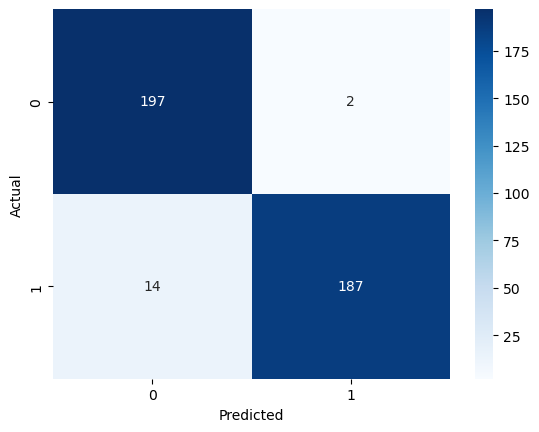

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [3]:
import numpy as np
# Find misclassified examples
misclassified = np.where(y_test != predictions)[0]

# Print some misclassified examples
for index in misclassified[:5]:
    print("Actual Label:", y_test.iloc[index])
    print("Predicted Label:", predictions[index])
    print("Text:", X_test.iloc[index])
    print("---" * 20)


Actual Label: 1
Predicted Label: 0
Text: greatest fear losing loved ones able protect also fear able continue love due health limitations
------------------------------------------------------------
Actual Label: 1
Predicted Label: 0
Text: believe term fits relationships women throughout life see someone objectifies exploits always tried treat women life respect care think important acknowledge difference consensual relationships women womanizer
------------------------------------------------------------
Actual Label: 1
Predicted Label: 0
Text: sorry personally familiar anyone named michele direct role work possible may misunderstanding confusion could provide context clarify question would happy try address
------------------------------------------------------------
Actual Label: 1
Predicted Label: 0
Text: blogger try thoughtful intentional everything post course human made mistakes moments regretted something posted felt could handled situation differently think important take resp